# 딥러닝 모델 설계하기

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

Data_set = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=',')
print(Data_set.shape)

X = Data_set[:, 0:-1]
y = Data_set[:, -1]

(470, 17)


## 손실(오차) 함수

### 선형회귀 모델:
    1. mean_squared_error</p>
    2. mean_absolute_error</p>
    3. mean_absolute_percentage_error</p>
    4. mean_squared_logalithmic_error</p>
### 이항, 단항분류 모델:
    1. categorical_crossentropy</p>
    2. binary_crossentropy</p>
    
## Metrics
https://nicola-ml.tistory.com/88?category=861724

In [5]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 3ms/step - loss: 16.3558 - accuracy: 0.1489
Epoch 2/5
30/30 [==============================] - 0s 2ms/step - loss: 6.1064 - accuracy: 0.1681
Epoch 3/5
30/30 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7766
Epoch 4/5
30/30 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.8489


In [9]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 30}

# 딥러닝과 데이터

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# 당뇨병 환자의 수 출력
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [15]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# 각요소간의 상관관계 -> df.corr
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


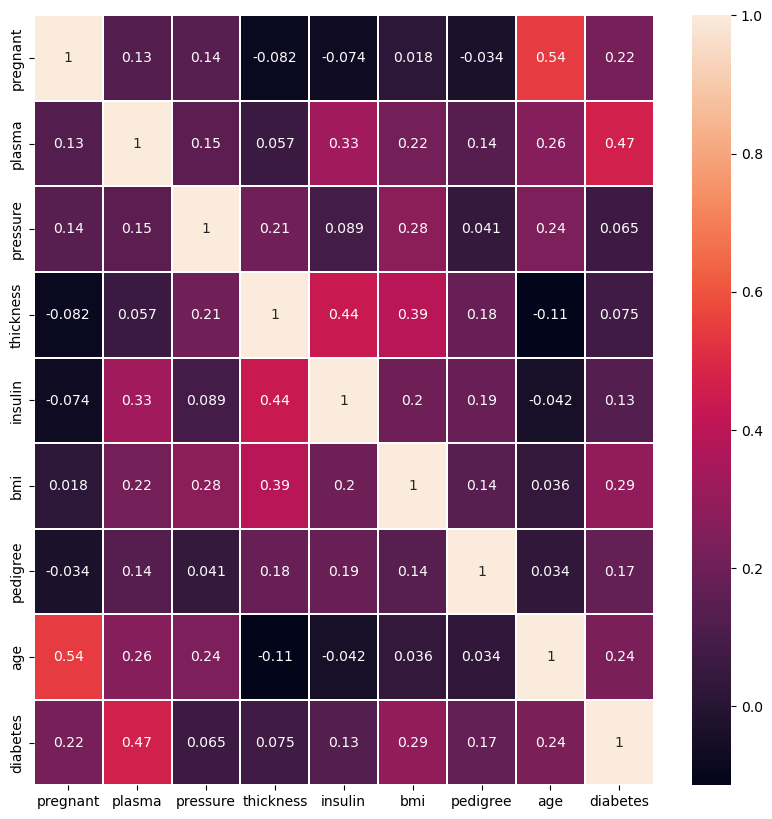

In [17]:
# 각요소간의 상관관계를 그래프로
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), linewidth=0.1, linecolor='white', annot=True) # cmap= ... matplotlib.colormaps()로 확인
plt.show()

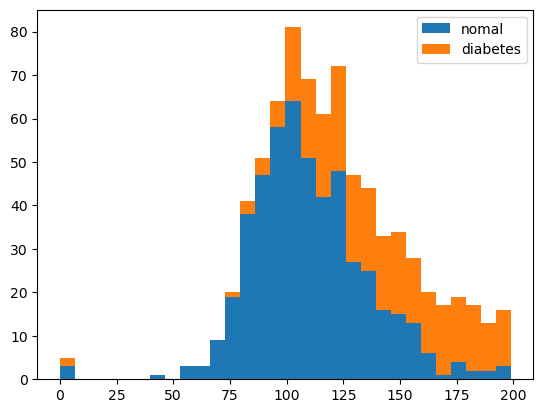

In [19]:
x = [df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]]
plt.hist(x=x, bins=30, histtype='barstacked', label=['nomal', 'diabetes'])
plt.legend()

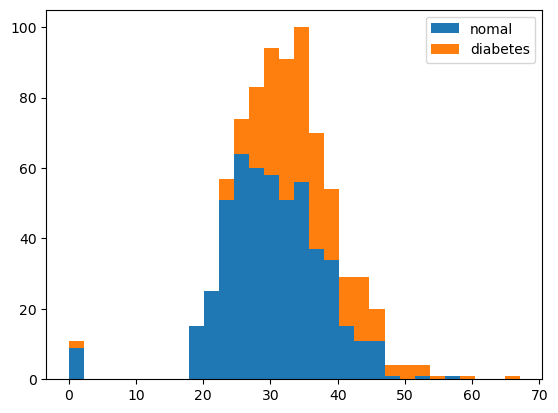

In [20]:
x = [df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]]
plt.hist(x=x, bins=30, histtype='barstacked', label=['nomal', 'diabetes'])
plt.legend()

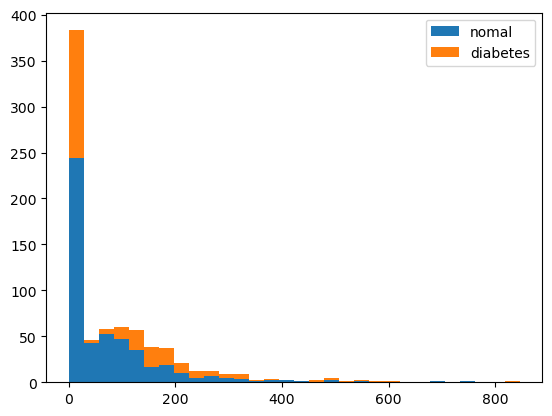

In [21]:
x = [df.insulin[df.diabetes==0], df.insulin[df.diabetes==1]]
plt.hist(x=x, bins=30, histtype='barstacked', label=['nomal', 'diabetes'])
plt.legend()

In [37]:
# 딥러닝 모델을 생성하고 모델을 실행
# 첫번째 layer node 수 -> 20, 활성함수 relu
# 첫번째 layer node 수 -> 10, 활성함수 relu
# 출력층 추가
# 모델의 구조 확인 -> model.summary()
# 옵티마저, 실행 횟수, 손실함수를 임의로 설정해서 모델 실행


X = np.array(df.iloc[:, 0:8])
y = np.array(df.iloc[:, 8])

In [40]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                180       
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(X, y, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 6.9425 - accuracy: 0.4909
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 3.3996 - accuracy: 0.4805
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 2.7778 - accuracy: 0.5000
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 2.3188 - accuracy: 0.5221
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 2.0708 - accuracy: 0.5794
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1.7622 - accuracy: 0.5898
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1.4898 - accuracy: 0.5690
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2905 - accuracy: 0.5820
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1434 - accuracy: 0.6263
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0306 - accuracy: 0.6354
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.7474
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7552
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.7279
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6399 - accuracy: 0.6823
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.7331
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7500
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.7292
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.7357
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7357
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7305
Epoch 93/100


In [46]:
X = np.array(df.loc[:, ['plasma', 'insulin', 'bmi', 'age']])
y = np.array(df.iloc[:, 8])

model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                100       
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(X, y, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 4.0131 - accuracy: 0.6523
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 2.4191 - accuracy: 0.6510
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2027 - accuracy: 0.6406
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.6172
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.6224
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6315
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.6393
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6445
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6380
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6380
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7148
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7201
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.7161
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7344
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7331
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7409
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7148
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7409
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7344
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7318
Epoch 93/100


In [86]:
# 유방암 자료를 가지고 딥러닝 학습
from sklearn.datasets import load_breast_cancer

Data = load_breast_cancer()

In [104]:
X = Data['data']
y = Data['target']

print(X.shape, y.shape)
print(np.unique(y))

(569, 30) (569,)
[0 1]


In [96]:
Data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [97]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

print(df_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [98]:
df_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [99]:
# 각요소간의 상관관계 -> df.corr
df_X.corr()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
2,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
3,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
4,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
5,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
6,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
7,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
8,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
9,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [100]:
df_X['c'] = df_y

print(df_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

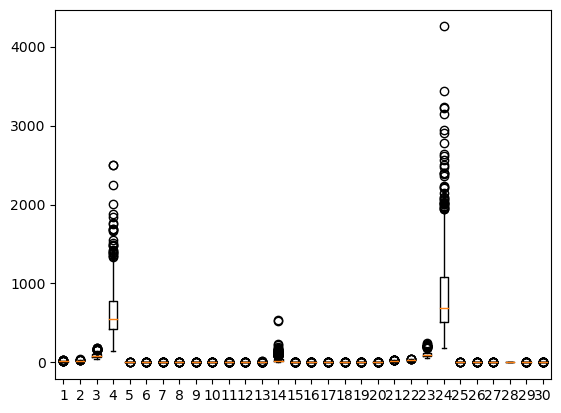

In [106]:
plt.boxplot(X)
plt.show()

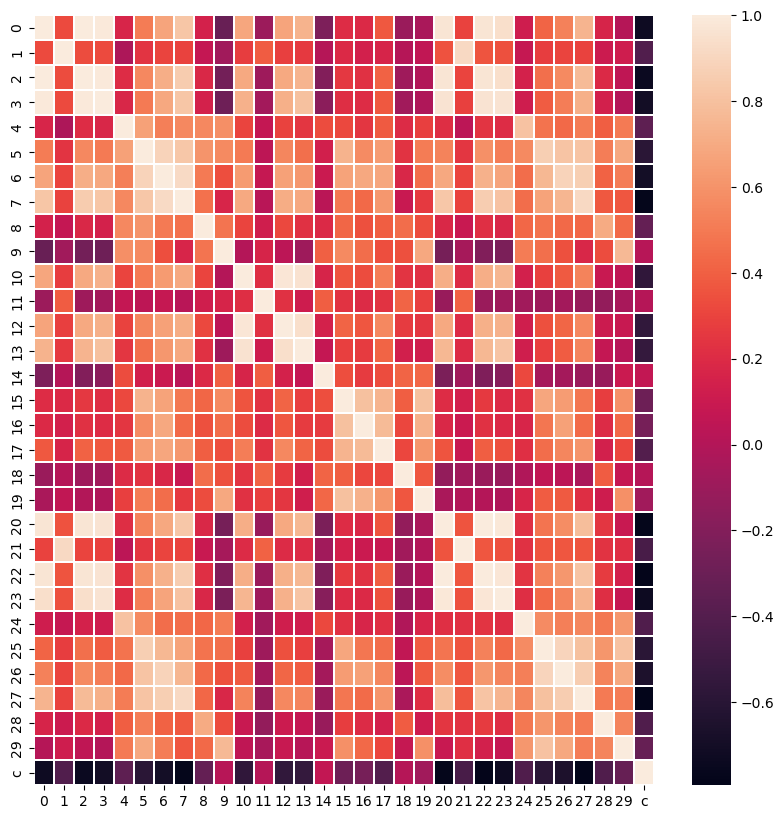

In [101]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_X.corr(), linewidth=0.1, linecolor='white') # cmap= ... matplotlib.colormaps()로 확인
plt.show()

In [108]:
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 50)                1550      
                                                                 
 dense_40 (Dense)            (None, 50)                2550      
                                                                 
 dense_41 (Dense)            (None, 30)                1530      
                                                                 
 dense_42 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,661
Trainable params: 5,661
Non-trainable params: 0
_________________________________________________________________


In [110]:
history = model.fit(X, y, epochs=2000, verbose=False, batch_size=100)

In [113]:
print(history.history['loss'][-1], history.history['accuracy'][-1])

0.02597545087337494 0.9894551634788513


In [120]:
X_names = Data['feature_names'][[3, 13, 23]]
X_names

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [121]:
X_str = X[:, [3, 13, 23]]

In [123]:
model = Sequential()
model.add(Dense(50, input_dim=X_str.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_str, y, epochs=2000, verbose=False, batch_size=100)

In [124]:
print(history.history['loss'][-1], history.history['accuracy'][-1])

0.13162113726139069 0.9384886026382446
